# Seaborn - Categorical Data Plots

Now let's discuss using seaborn to plot categorical data! There are a few main plot types for this:

* factorplot
* boxplot
* violinplot
* stripplot
* swarmplot
* barplot
* countplot

### Categorical plots concern about single distributions of a categorican columns (such as sex, day, smoker, etc.) in reference either to numerical or another categorical column. (They behave as groupby and aggregation functions)

**Simple plots like barplots, countplots and boxplots, are suitable for presenting data to managers and CEOs. The adcanced plots like violinplots, stripplots, swarmplots, etc., are suitable for presenting data to advanced people, like data scientists.**

In [1]:
import seaborn as sns
%matplotlib inline

In [2]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## barplot and countplot

These very similar plots allow you to get aggregate data off a categorical feature in your data. **barplot** is a general plot that allows you to aggregate the categorical data based off some function, by default the **mean**:

/home/iotlab_user/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


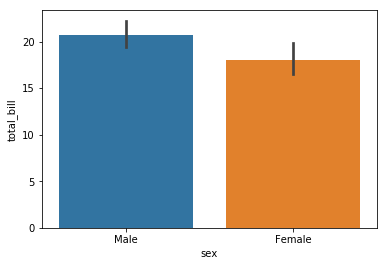

In [3]:
sns.barplot(x='sex',y='total_bill',data=tips)  # where x: categorical column values, y: numerical column values
# outcome is the default parameter aggregation function "mean" of the "estimator" argument for each category

### Change the aggregation function: 
#### argument: estimator (aggregation function)

In [4]:
import numpy as np

You can change the estimator object to your own function, that converts a vector to a scalar:

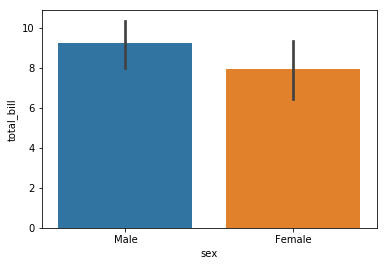

In [5]:
sns.barplot(x='sex',y='total_bill',data=tips, estimator=np.std) # here you pass the standard deviation function in estimator
# a groupby mechanism is executed here

### countplot

This is essentially the same as barplot except the estimator is explicitly counting the number of occurrences. Which is why I only pass the x value:

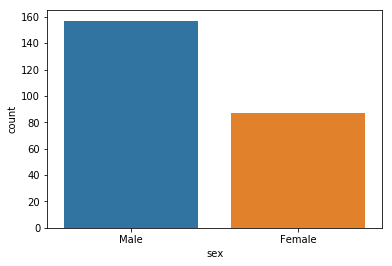

In [6]:
sns.countplot(x='sex',data=tips)

## boxplot and violinplot

boxplots and violinplots are used to shown the distribution of categorical data. A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

* A boxplot is also known as a box and whisker plot

### boxplot
#### Note: It also depicts the outliers outside the whiskers

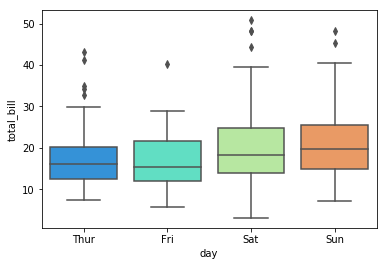

In [7]:
sns.boxplot(x="day", y="total_bill", data=tips, palette='rainbow')  # x: categorical data, y: numerical data
# palette arguments helps to colorize the data in a cleaner way

#### hue argument: You pass in the categorical column you want and it splits the previous classified data into that category (here: smokers):

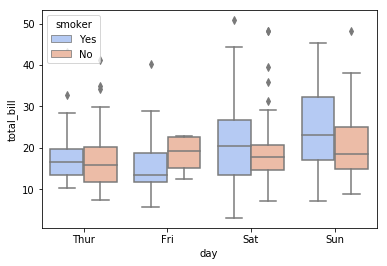

In [8]:
sns.boxplot(x="day", y="total_bill", hue="smoker",data=tips, palette="coolwarm")
# here you can see and compare also the distribution between smokers and non-smokers for each day

#### Can do entire dataframe with orient='h' (horizontal orientation) - it calculates only numerical values

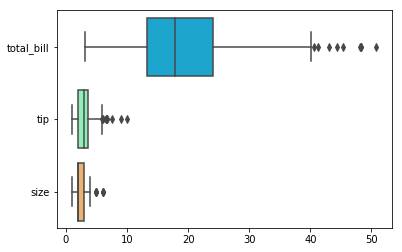

In [9]:
sns.boxplot(data=tips,palette='rainbow',orient='h')

### violinplot
A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

Note: It just gives you a lot more information of the data than a box plot (as far as the distribution of all the points themselves), but it kind of comes at the cost you have to spend a little more time looking at it and understanding

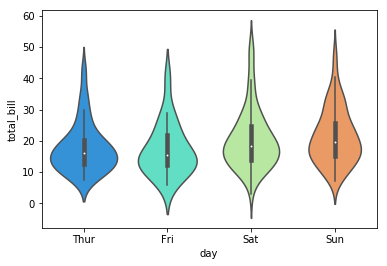

In [10]:
sns.violinplot(x="day", y="total_bill", data=tips, palette='rainbow')  # x: categorical, y: numerical

#### hue argument: You pass in the categorical column you want and it splits the previous classified data into that category (here: sex):

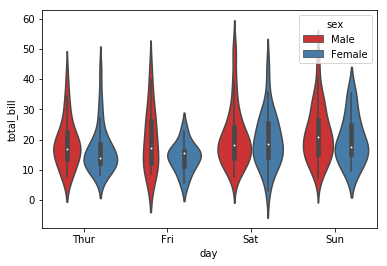

In [11]:
sns.violinplot(x="day", y="total_bill", data=tips, hue='sex', palette='Set1')

#### split argument: Combine the two category distribution plots of each x axis category (better way to compare data distribution), It depicts that way more information. More mathematically extended than boxplots.

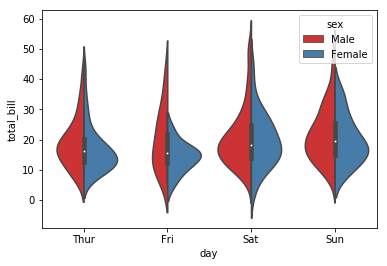

In [12]:
sns.violinplot(x="day", y="total_bill", data=tips, hue='sex', split=True, palette='Set1')

## stripplot and swarmplot
The stripplot will draw a scatterplot where one variable is categorical. A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.

The swarmplot is similar to stripplot(), but the points are adjusted (only along the categorical axis) so that they don’t overlap. This gives a better representation of the distribution of values, although it does not scale as well to large numbers of observations (both in terms of the ability to show all the points and in terms of the computation needed to arrange them).

### stripplot ( it is actually a scatter plot for categorical data)

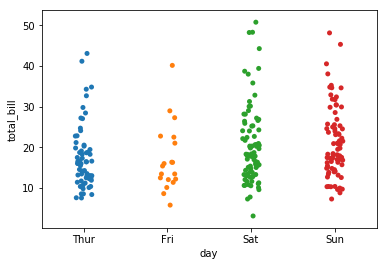

In [13]:
sns.stripplot(x="day", y="total_bill", data=tips)  # x: categorical, y: numerical

#### jitter arguments: it adds a little noise to the data so you can read more conveniently. You can actually see the dinsity of the data a little better

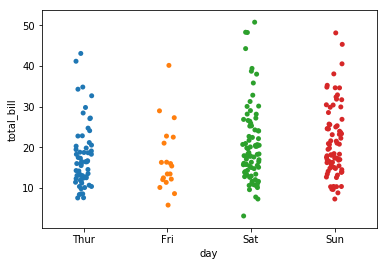

In [14]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True)

#### hue and split arguments: like boxplot and violinplot (updated in stripplot: split --> dodge (see below))

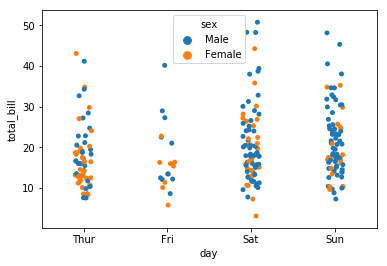

In [15]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True, hue='sex')

/home/iotlab_user/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


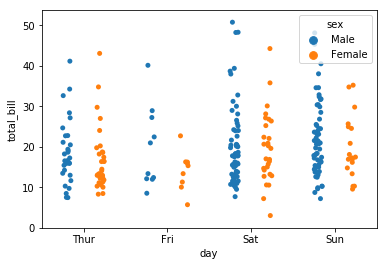

In [16]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True, hue='sex', split=True)

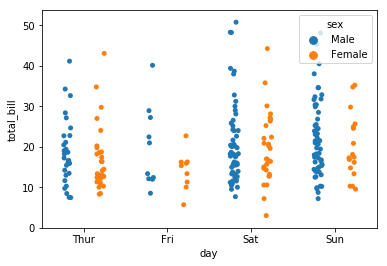

In [17]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True, hue='sex', dodge=True)

### swarmplot (combination of stripplot vs. violinplot)
*Note:* The swarmplot is similar to stripplot(), but the points are adjusted (only along the categorical axis) so that they don’t overlap. This gives a better representation of the distribution of values, although it does not scale as well to large numbers of observations (both in terms of the ability to show all the points and in terms of the computation needed to arrange them).

**Note:** Don't use swarmplot for **very large datasets**. It can cause big overlaps between data points. It also uses a large amount of computation for the visualization.

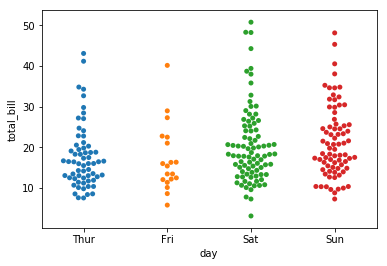

In [18]:
sns.swarmplot(x="day", y="total_bill", data=tips)

### Combining Categorical Plots (here, swarmplot with violinplot):
**Perfect for exploratory analysis:** these kind of plots are more advanced violent plots stripplots/swarmplots are just more suited for data scientists themselves and had actually read in or explore your data information.

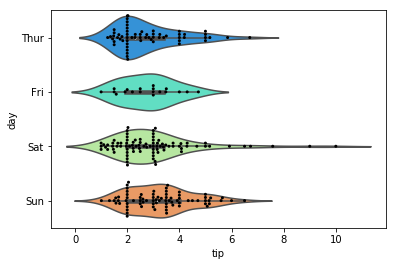

In [19]:
sns.violinplot(x="tip", y="day", data=tips, palette='rainbow')
sns.swarmplot(x="tip", y="day", data=tips, color='black', size=3) # color: color of the data points, size: the size of points

## factorplot

factorplot is the most general form of a categorical plot. It can take in a **kind** parameter to adjust the plot type:

/home/iotlab_user/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


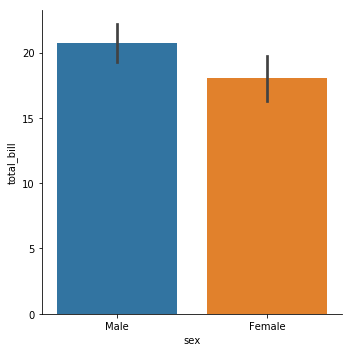

In [20]:
sns.factorplot(x='sex',y='total_bill', data=tips, kind='bar')  # here, make a barplot

/home/iotlab_user/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


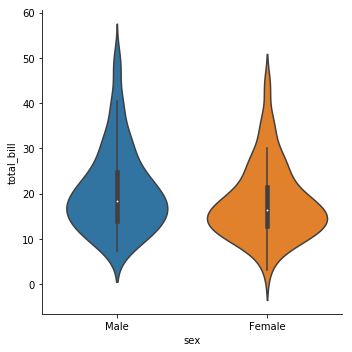

In [21]:
sns.factorplot(x='sex',y='total_bill', data=tips, kind='violin')  # here, make a violinplot